# Correlation of CD20 CITE-Seq and CD20 mRNA
- Ruoyi Jiang
- March 2, 2020
- For rebuttal

- https://github.com/kotliary/baseline/cite_seq/R/hand_gating.r

from Kotliarov et al. 

B cells come from cluster C3 in figure 4c. 
The data presented here corresponds to data used to generate extended figure 8d. 

In [2]:
library(alakazam)
library(tidyverse)
library(Seurat)

Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



In [3]:
source("/hg/pipeline_abseq/api/saturn/saturn.R")
PLOT_DIR <- "/data/plots"


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘package:tibble’:

    as_data_frame

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘lazyeval’

The following objects are masked from ‘package:purrr’:

    is_atomic, is_formula



In [10]:
# Converts to Seurat 3.0
# install.packages("Seurat")

Installing package into ‘/home/ruoyi/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [15]:
# Converts to Seurat 2.0
source("https://z.umn.edu/archived-seurat")

Warning message:
“Downgrading Seurat from v3.1.5 to v2.3.4”Installing package into ‘/home/ruoyi/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [19]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: Fedora 31 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] Seurat_2.3.4    lazyeval_0.2.2  boot_1.3-22     igraph_1.2.4.1 
 [5] forcats_0.4.0   stringr_1.4.0   dplyr_0.8.3     purrr_0.3.3    
 [9] readr_1.3.1     tidyr_1.0.0     tibble_2.1.3    tidyverse_1.3.0
[13] alakazam_0.3.0  ggplot2_3.2.1  

loaded via a namespace (and not attached):
  [1] readxl_1.3.1        uuid_0.1-2 

In [3]:
# cd /data
# wget -C https://nih.figshare.com/ndownloader/articles/11349761/versions/1
# mv 1 cite.zip
# unzip cite.zip

In [4]:
tmp <- readRDS("/data/10x/cite/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds")

In [ ]:
total_expr_df <- data.frame(as.matrix(tmp@data))  %>%
    add_rownames("GENE") %>%
    filter(GENE == "MS4A1") %>%
    gather(CELL, EXPR, -GENE)

In [ ]:
# low vs high responders
response_vec = tmp@meta.data %>% 
    mutate(response = str_remove(adjmfc.time, "d0 ")) %>% select(response) %>% unlist()

In [ ]:
total_expr_df <- total_expr_df %>% ungroup() %>%
    mutate(SUBJECT = tmp@meta.data$sampleid, RESPONSE = response_vec)

In [86]:
head(total_expr_df)

GENE  CELL                     EXPR SAMPLE  SUBJECT RESPONSE
1 MS4A1 AAACCTGAGAGCCCAA_H1B1ln1 0    H1B1ln1 256     high    
2 MS4A1 AAACCTGAGGCGTACA_H1B1ln1 0    H1B1ln1 273     low     
3 MS4A1 AAACCTGCAGGTGGAT_H1B1ln1 0    H1B1ln1 256     high    
4 MS4A1 AAACCTGCAGTATCTG_H1B1ln1 0    H1B1ln1 200     low     
5 MS4A1 AAACCTGCATCACAAC_H1B1ln1 0    H1B1ln1 233     low     
6 MS4A1 AAACCTGCATGGTCAT_H1B1ln1 0    H1B1ln1 256     high

In [85]:
dim(total_expr_df)

[1] 53201     6

In [7]:
total_expr_df %>%
    group_by(EXPR < 1) %>%
    summarize(COUNT = n())

Warning message:
“Grouping rowwise data frame strips rowwise nature”

EXPR < 1 COUNT
1 FALSE     4958
2  TRUE    48243

In [11]:
joined_df %>%
    group_by(PROT_EXPR < 4) %>%
    summarize(COUNT = n())

PROT_EXPR < 4 COUNT
1 FALSE          5955
2  TRUE         47246

### Analysis of all cells in cluster C3

In [ ]:
cite_df = tmp@assay$CITE@data %>% as.data.frame() %>% 
  tibble::rownames_to_column("protein") %>% 
  gather("cell","value", -protein) 

In [ ]:
joined_df <- cite_df %>%
    filter(protein == "CD20_PROT") %>%
    dplyr::select(-protein) %>%
    rename(CELL = cell, PROT_EXPR = value) %>%
    left_join(total_expr_df, by = 'CELL')

In [14]:
head(joined_df)

CELL                     PROT_EXPR  GENE  EXPR SAMPLE 
1 AAACCTGAGAGCCCAA_H1B1ln1 -1.2754191 MS4A1 0    H1B1ln1
2 AAACCTGAGGCGTACA_H1B1ln1 -0.2472769 MS4A1 0    H1B1ln1
3 AAACCTGCAGGTGGAT_H1B1ln1  1.6183978 MS4A1 0    H1B1ln1
4 AAACCTGCAGTATCTG_H1B1ln1  1.0473654 MS4A1 0    H1B1ln1
5 AAACCTGCATCACAAC_H1B1ln1  1.1298141 MS4A1 0    H1B1ln1
6 AAACCTGCATGGTCAT_H1B1ln1  1.4300152 MS4A1 0    H1B1ln1

In [160]:
cor.test(joined_df$PROT_EXPR, joined_df$EXPR)


	Pearson's product-moment correlation

data:  joined_df$PROT_EXPR and joined_df$EXPR
t = 254.87, df = 53199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7376107 0.7452627
sample estimates:
      cor 
0.7414608 


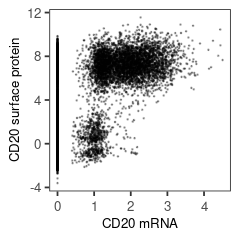

In [163]:
options(repr.plot.width = 2, repr.plot.height = 2)

ggplot(joined_df, aes(x = EXPR, y = PROT_EXPR)) + 
    baseTheme() +
    geom_point(size = 0.1, alpha = 0.3) + 
    xlab("CD20 mRNA") +
    ylab("CD20 surface protein")

### Analysis of B cells "cleaned" (K1)

In [ ]:
bc = SubsetData(tmp, subset.name = "K1", accept.value = "C3")

In [ ]:
cite_df = bc@assay$CITE@data %>% as.data.frame() %>% 
  tibble::rownames_to_column("protein") %>% 
  gather("cell","value", -protein) 

In [ ]:
# combine with cite-seq, zscore normalize gene expression
joined_df <- cite_df %>%
    filter(protein == "CD20_PROT") %>%
    dplyr::select(-protein) %>%
    rename(CELL = cell, PROT_EXPR = value) %>%
    left_join(total_expr_df, by = 'CELL') %>%
    rowwise() %>%
    mutate(SAMPLE = strsplit(CELL, '_')[[1]][2]) %>%
    group_by(SAMPLE, SUBJECT) %>%
    mutate(EXPR_NORM = (EXPR - mean(EXPR))/sd(EXPR)) %>%
    filter(RESPONSE == "low")

In [263]:
subjects <- unique(joined_df$SUBJECT)

In [264]:
sample_corr_list <- list()
for(subject in subjects){
    sample_corr_list[[subject]] <- data.frame(
        CORR = cor.test(filter(joined_df, SUBJECT == subject)$PROT_EXPR, 
         filter(joined_df, SUBJECT == subject)$EXPR_NORM)$estimate,
        SUBJECT = subject
    )
}

In [265]:
sample_corr_df <- bind_rows(sample_corr_list)

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding cha

In [266]:
sample_corr_df %>% arrange(SUBJECT)

CORR       SUBJECT
1  0.11346359 200    
2  0.11038346 201    
3  0.10570067 229    
4  0.21079448 233    
5  0.13368074 236    
6  0.05315836 261    
7  0.02638213 268    
8  0.16538783 273    
9  0.21441140 277    
10 0.20406863 279

In [ ]:
#0.113, 0.110, 0.106, 0.211, 0.134, 0.053, 0.026, 0.165, 0.214, 0.204

In [1]:
binom.test(sum(sample_corr_df$CORR > 0), length(sample_corr_df$CORR))

ERROR: Error in binom.test(sum(sample_corr_df$CORR > 0), length(sample_corr_df$CORR)): object 'sample_corr_df' not found


In [287]:
t.test(sample_corr_df$CORR)


	One Sample t-test

data:  sample_corr_df$CORR
t = 6.4956, df = 9, p-value = 0.000112
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.08716554 0.18032071
sample estimates:
mean of x 
0.1337431 


### Compare surface expression 

In [295]:
joined_df <- joined_df %>%
    group_by(SUBJECT, SAMPLE) %>%
    mutate(MEDIAN_EXPR = median(EXPR_NORM)) %>%
    rowwise() %>%
    mutate(LOW_EXPR = if(EXPR_NORM < MEDIAN_EXPR){"Low CD20 mRNA"}else{"High CD20 mRNA"}) 

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [289]:
cor.test(joined_df$PROT_EXPR, 
         joined_df$EXPR_NORM)


	Pearson's product-moment correlation

data:  joined_df$PROT_EXPR and joined_df$EXPR_NORM
t = 6.7254, df = 3015, p-value = 2.086e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08626353 0.15658099
sample estimates:
      cor 
0.1215748 


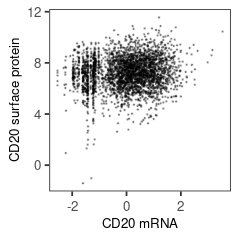

In [314]:
options(repr.plot.width = 2, repr.plot.height = 2)

p <- ggplot(joined_df, aes(x = EXPR_NORM, y = PROT_EXPR)) + 
    baseTheme() +
    geom_point(size = 0.1, alpha = 0.3)  + 
    xlab("CD20 mRNA") +
    ylab("CD20 surface protein")
plot(p)

In [315]:
plotFigure(p, file.path(PLOT_DIR, "cite_seq_corr.pdf"), 2, 2)

png 
  2

In [296]:
expr_tab <- joined_df %>%
    group_by(LOW_EXPR, SUBJECT) %>%
    summarize(MEAN = mean(PROT_EXPR))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [298]:
expr_tab

LOW_EXPR       SUBJECT MEAN    
1  High CD20 mRNA 200     8.148335
2  High CD20 mRNA 201     6.979026
3  High CD20 mRNA 229     7.210697
4  High CD20 mRNA 233     7.940522
5  High CD20 mRNA 236     7.153707
6  High CD20 mRNA 261     7.499168
7  High CD20 mRNA 268     7.426610
8  High CD20 mRNA 273     6.593064
9  High CD20 mRNA 277     7.844917
10 High CD20 mRNA 279     6.963615
11 Low CD20 mRNA  200     7.942422
12 Low CD20 mRNA  201     6.744592
13 Low CD20 mRNA  229     6.985464
14 Low CD20 mRNA  233     7.544495
15 Low CD20 mRNA  236     6.802571
16 Low CD20 mRNA  261     7.322849
17 Low CD20 mRNA  268     7.415288
18 Low CD20 mRNA  273     6.278246
19 Low CD20 mRNA  277     7.558883
20 Low CD20 mRNA  279     6.602860

In [301]:
expr_sum <- expr_tab %>%
    group_by(LOW_EXPR) %>%
    summarize(MEAN = mean(MEAN))

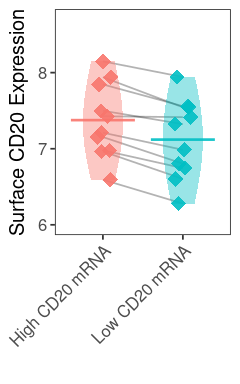

In [309]:
options(repr.plot.width=2, repr.plot.height=3.2)
p <- ggplot(expr_tab, aes(x=LOW_EXPR, y=MEAN)) +
    baseTheme() + 
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(size=10, angle = 45, hjust = 1, vjust = 1), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    xlab("") +
    ylab(expression("Surface CD20 Expression")) +
    scale_y_continuous(limits= c(6, 8.7)) +
    geom_line(aes(group = SUBJECT), alpha =0.3) +
    geom_jitter(aes(color=LOW_EXPR), size=4, pch=18, alpha=0.9, width=0.1) +
    geom_violin(aes(fill=LOW_EXPR), color=NA, alpha=0.4, scale="width", trim=T, adjust=2, width=0.5) +
    geom_errorbarh(data=expr_sum, 
                   aes(y=MEAN, color=LOW_EXPR, xmin=(..x..) - 0.4, xmax=(..x..) + 0.4),
                   height=0, size=0.75, position=position_dodge(0.9), alpha=0.9)
plot(p)

In [310]:
plotFigure(p, file.path(PLOT_DIR, "cite_seq_validation.pdf"), 2, 3.2)

png 
  2

In [304]:
t.test(filter(expr_tab, LOW_EXPR == "High CD20 mRNA")$MEAN - 
filter(expr_tab, LOW_EXPR == "Low CD20 mRNA")$MEAN)


	One Sample t-test

data:  filter(expr_tab, LOW_EXPR == "High CD20 mRNA")$MEAN - filter(expr_tab,     LOW_EXPR == "Low CD20 mRNA")$MEAN
t = 7.1945, df = 9, p-value = 5.114e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1756424 0.3367558
sample estimates:
mean of x 
0.2561991 
